In [1]:
# Analysis of HUDOC documents
# Corpus from 31/01/2019, scraped using https://github.com/ajbarker93/caseScrape

In [77]:
# Import libraries
import json
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from price_parser import Price
from sklearn.linear_model import LinearRegression
from forex_python.converter import CurrencyRates
import seaborn as sns

In [6]:
# Check drive contents
rootdir="/users/adambarker/case_scrape/"
os.chdir(rootdir)
os.listdir()

['docToText',
 'results.pkl',
 '.DS_Store',
 'example.db',
 'listOfIDs.txt',
 'scrape_to_db.py',
 'findIDs.py',
 'moveToSub.py',
 'README.md',
 'triage.py',
 '.gitignore',
 'docToText2',
 'automate.sh',
 'summaries',
 '.ipynb_checkpoints',
 'documents',
 'documents_to_text',
 '.git',
 'Analysis.ipynb',
 'getDocuments.py',
 'convertToJSON.py']

In [7]:
# Set wildcards for selecting P1-1 cases
wildcards = ['1-1','P1','P1-1','P1-1-1','Protocol 1-1','Article 1','Article 1 al. 1 du Protocole','1 du Protocole n° 1']

In [69]:
# Import pickle file of results content
results = pd.read_pickle("./results.pkl")

# Remove all rows where the content failed
results = results.loc[results['content']!='']

results.head()

,case,case_id,content,claimed,awarded,num_awarded,num_claimed,violation
6,CASE OF ORAL AND OTHERS v. TURKEY,001-60396,FIRST SECTION CASE OF ORAL AND OTHERS ...,,,,,
7,CASE OF ULGER v. TURKEY,001-60397,THIRD SECTION CASE OF ÜLGER v. TURKEY...,,,,,
18,Wessels-Bergervoet c. Pays-Bas,002-5323,Note d’information sur la jurisprudence de la ...,,,,,
19,Olivieira c. Pays-Bas,002-5335,Note d’information sur la jurisprudence de la ...,,,,,
20,Ali Erol c. Turquie,002-5317,Note d’information sur la jurisprudence de la ...,,,,,


In [70]:
# Inspect some content
results.head()

,case,case_id,content,claimed,awarded,num_awarded,num_claimed,violation
6,CASE OF ORAL AND OTHERS v. TURKEY,001-60396,FIRST SECTION CASE OF ORAL AND OTHERS ...,,,,,
7,CASE OF ULGER v. TURKEY,001-60397,THIRD SECTION CASE OF ÜLGER v. TURKEY...,,,,,
18,Wessels-Bergervoet c. Pays-Bas,002-5323,Note d’information sur la jurisprudence de la ...,,,,,
19,Olivieira c. Pays-Bas,002-5335,Note d’information sur la jurisprudence de la ...,,,,,
20,Ali Erol c. Turquie,002-5317,Note d’information sur la jurisprudence de la ...,,,,,


In [72]:
# Filter the results further, choosing the relevant judgement section
# It's a bit of a devil, but the original words docs did not have correctly
# formatted headings, so we couldn't save as a json and then look for the 
# specific heading

# Define a simple set of start and end wildcards for the claimed and awarded sections
cl_start_str='SECTION'
cl_end_str='President'
aw_start_str='SECTION'
aw_end_str='President'

for i in range(0,len(results)):

  result = results['content'].iloc[i]

  if len(result.split(cl_start_str))>1:
    
    # Choose text from start wildcard onwards
    to_end = result.split(cl_start_str)[1]
    # Choose text before end wildcard
    from_start = to_end.split(cl_end_str)[0]
    # Add to resuls array
    results['claimed'].iloc[i] = from_start

  if len(result.split(aw_start_str))>1:
    
    # Repeat for awarded section
    to_end = result.split(aw_start_str)[1]
    from_start = to_end.split(aw_end_str)[0]
    results['awarded'].iloc[i] = from_start

results.head()

,case,case_id,content,claimed,awarded,num_awarded,num_claimed,violation
6,CASE OF ORAL AND OTHERS v. TURKEY,001-60396,FIRST SECTION CASE OF ORAL AND OTHERS ...,CASE OF ORAL AND OTHERS v. TURKEY (Appl...,CASE OF ORAL AND OTHERS v. TURKEY (Appl...,,,
7,CASE OF ULGER v. TURKEY,001-60397,THIRD SECTION CASE OF ÜLGER v. TURKEY...,CASE OF ÜLGER v. TURKEY (Application n...,CASE OF ÜLGER v. TURKEY (Application n...,,,
18,Wessels-Bergervoet c. Pays-Bas,002-5323,Note d’information sur la jurisprudence de la ...,,,,,
19,Olivieira c. Pays-Bas,002-5335,Note d’information sur la jurisprudence de la ...,,,,,
20,Ali Erol c. Turquie,002-5317,Note d’information sur la jurisprudence de la ...,,,,,


In [73]:
# Results
results.head()

,case,case_id,content,claimed,awarded,num_awarded,num_claimed,violation
6,CASE OF ORAL AND OTHERS v. TURKEY,001-60396,FIRST SECTION CASE OF ORAL AND OTHERS ...,CASE OF ORAL AND OTHERS v. TURKEY (Appl...,CASE OF ORAL AND OTHERS v. TURKEY (Appl...,,,
7,CASE OF ULGER v. TURKEY,001-60397,THIRD SECTION CASE OF ÜLGER v. TURKEY...,CASE OF ÜLGER v. TURKEY (Application n...,CASE OF ÜLGER v. TURKEY (Application n...,,,
18,Wessels-Bergervoet c. Pays-Bas,002-5323,Note d’information sur la jurisprudence de la ...,,,,,
19,Olivieira c. Pays-Bas,002-5335,Note d’information sur la jurisprudence de la ...,,,,,
20,Ali Erol c. Turquie,002-5317,Note d’information sur la jurisprudence de la ...,,,,,


In [74]:
# Now find numerical content and try to arrive at a claimed figure

# Define list of allowed currencies
curr = ['EUR','EURO','GBP','USD','Euros','Pounds','Dollars','French','Turkish','FRF']

# Remove all rows where the content failed
results = results.loc[results['claimed']!='']
results = results.loc[results['awarded']!='']

# Define function to find currencies in string
def find_currency(x):
  px = [Price.fromstring(i) for i in x.split(".")]
  px2 = [t.amount for t in px if t.currency in curr]
  return px2

# Update the num claimed col
results['num_claimed'] = results.apply(lambda x: find_currency(str(x['claimed'])),axis=1)
results['num_awarded'] = results.apply(lambda x: find_currency(str(x['awarded'])),axis=1)

# Set the fields to zero if they contain an empty list
results.num_awarded = results.num_awarded.apply(lambda y: [0] if (len(y)==0) else y)
results.num_claimed = results.num_claimed.apply(lambda y: [0] if (len(y)==0) else y)

results.head()

,case,case_id,content,claimed,awarded,num_awarded,num_claimed,violation
6,CASE OF ORAL AND OTHERS v. TURKEY,001-60396,FIRST SECTION CASE OF ORAL AND OTHERS ...,CASE OF ORAL AND OTHERS v. TURKEY (Appl...,CASE OF ORAL AND OTHERS v. TURKEY (Appl...,[0],[0],
7,CASE OF ULGER v. TURKEY,001-60397,THIRD SECTION CASE OF ÜLGER v. TURKEY...,CASE OF ÜLGER v. TURKEY (Application n...,CASE OF ÜLGER v. TURKEY (Application n...,[0],[0],
27,WARLET contre la FRANCE,001-43477,DEUXIÈME SECTION DÉCISION PARTIELLE SUR LA REC...,DÉCISION PARTIELLE SUR LA RECEVABILITÉ de la ...,DÉCISION PARTIELLE SUR LA RECEVABILITÉ de la ...,[0],[0],
28,PFLEGER contre la REPUBLIQUE TCHEQUE,001-43417,DEUXIÈME SECTION DÉCISION PARTIELLE SUR LA REC...,DÉCISION PARTIELLE SUR LA RECEVABILITÉ de la ...,DÉCISION PARTIELLE SUR LA RECEVABILITÉ de la ...,[0],[0],
29,VODRAZKA contre la REPUBLIQUE TCHEQUE,001-43419,DEUXIÈME SECTION DÉCISION SUR LA RECEVABILITÉ ...,DÉCISION SUR LA RECEVABILITÉ de la requête n°...,DÉCISION SUR LA RECEVABILITÉ de la requête n°...,[0],[0],


In [41]:
# Quick test, only choose the max values
results.num_awarded = results.num_awarded.apply(lambda y: max(y))
results.num_claimed = results.num_claimed.apply(lambda y: max(y))

results

/Users/adambarker/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,case,case_id,content,claimed,awarded,num_awarded,num_claimed,violation
6,CASE OF ORAL AND OTHERS v. TURKEY,001-60396,FIRST SECTION CASE OF ORAL AND OTHERS ...,CASE OF ORAL AND OTHERS v. TURKEY (Appl...,16. On 15 January 2002 the Court received th...,2002,2002,
7,CASE OF ULGER v. TURKEY,001-60397,THIRD SECTION CASE OF ÜLGER v. TURKEY...,,,0,0,
18,Wessels-Bergervoet c. Pays-Bas,002-5323,Note d’information sur la jurisprudence de la ...,,,0,0,
19,Olivieira c. Pays-Bas,002-5335,Note d’information sur la jurisprudence de la ...,,,0,0,
20,Ali Erol c. Turquie,002-5317,Note d’information sur la jurisprudence de la ...,,,0,0,


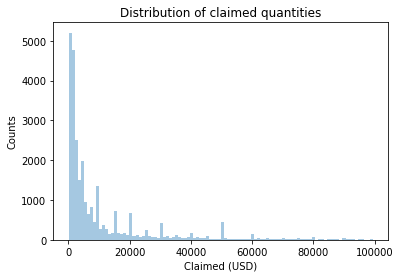

In [103]:
# Look at distribution of claimed values

# First ungroup
results2 = results.explode('num_claimed')

minlim = 1e2
maxlim = 1e5
bns=100
sns.distplot(results2['num_claimed'][(results2['num_claimed']>minlim)&(results2['num_claimed']<maxlim)],kde=False, bins=bns)
plt.title('Distribution of claimed quantities')
plt.xlabel('Claimed (USD)')
plt.ylabel('Counts')
plt.show()

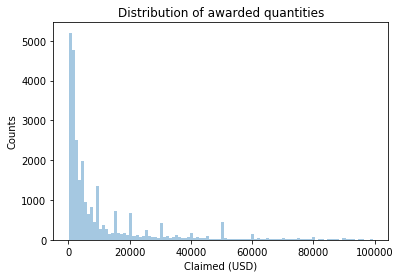

In [107]:
# Look at distribution of awarded values

# First ungroup
results2 = results.explode('num_awarded')

minlim = 1e2
maxlim = 1e5
bns=100
sns.distplot(results2['num_awarded'][(results2['num_awarded']>minlim)&(results2['num_awarded']<maxlim)],kde=False, bins=bns)
plt.title('Distribution of awarded quantities')
plt.xlabel('Claimed (USD)')
plt.ylabel('Counts')
plt.show()

/Users/adambarker/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  
/Users/adambarker/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


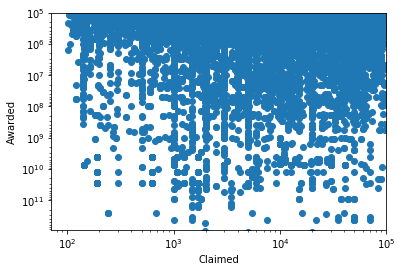

In [121]:
# First ungroup
results2 = results.explode('num_awarded')
results2 = results2.explode('num_claimed')

x = results2['num_claimed'][(results2['num_claimed']>minlim)&(results2['num_claimed']<maxlim)]
y = results2['num_awarded'][(results2['num_claimed']>minlim)&(results2['num_claimed']<maxlim)]

# Quick plotting. Plot on log-log scale
plt.scatter(x,y)
plt.xscale(value='log')
plt.yscale(value='log')
plt.xlabel('Claimed')
plt.ylabel('Awarded')
plt.xlim((0,maxlim))
plt.ylim((0,maxlim))
plt.show()